In [1]:
import pandas as pd
from pathlib import Path

file = Path("../data/sf_sub_clause/new_sf_sub_clause.tsv")

df = pd.read_csv(file, sep="\t")
# Filter rows based on column: 'speech_word_count'b

In [2]:
thorgerdur = df[df["person"] == "THorgerdurGunnarsdottir"]

In [3]:
max_year = thorgerdur["year"].max()
min_year = thorgerdur["year"].min()
print(min_year, max_year)

2000 2021


In [4]:
first_year_speeches = thorgerdur[thorgerdur["year"] == min_year]["speech_id"].drop_duplicates().head(25)
latest_year_speeches = thorgerdur[thorgerdur["year"] == max_year]["speech_id"].drop_duplicates().head(25)


In [5]:
filtered = thorgerdur[thorgerdur['speech_id'].isin(pd.concat([first_year_speeches, latest_year_speeches]))]

In [6]:
from pathlib import Path

speech_texts = Path("../data/formality_test")
person = "THorgerdurGunnarsdottir"

In [23]:
texts = []

speech_ids = filtered["speech_id"].unique()

for filename in speech_ids:
    file = speech_texts / f"{person}_{filename}.txt"

    with open(file, "r") as f:
        texts.append(f.read())


In [66]:
from gpt_classification import get_scores

In [67]:
responses = get_scores(texts)

In [68]:
scores = list(zip(speech_ids, responses))

In [69]:
thorgerdur_no_dupl = thorgerdur.drop_duplicates(subset="speech_id", keep="first")

In [70]:
results = []
for file, score in scores:
    row = thorgerdur_no_dupl[thorgerdur_no_dupl["speech_id"] == file]
    lex_score = row["lex_score"].values[0]
    year = row["year"]
    results.append([file, year, float(score), lex_score])

In [71]:
df = pd.DataFrame(results, columns=["file","year","gpt_score", "mattr_score"])

In [72]:
save_path = Path("../data/gpt_scores/test_1_en.tsv").resolve()

if not save_path.exists():
    df.to_csv(save_path, sep="\t", index=False)

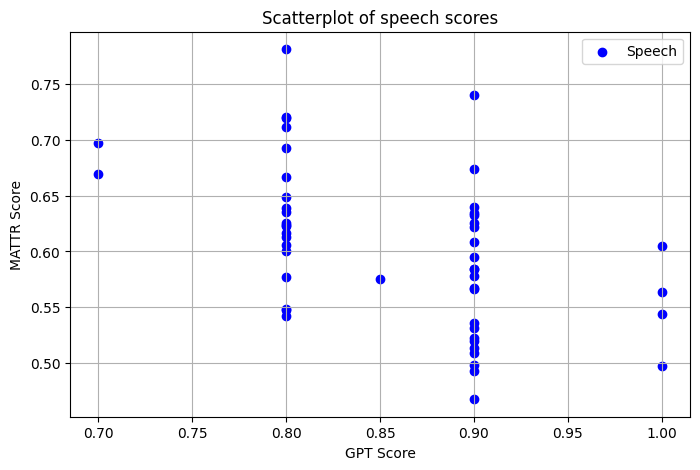

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df['gpt_score'], df['mattr_score'], color="blue", label='Speech')
plt.title('Scatterplot of speech scores')
plt.xlabel('GPT Score')
plt.ylabel('MATTR Score')
plt.legend()
plt.grid(True)
plt.show()

In [92]:
import scipy.stats

linear = scipy.stats.linregress(df['mattr_score'], df["gpt_score"])
linear.rvalue

np.float64(-0.4956536821822147)

In [93]:
compare = []
names = []
for file in Path("../data/gpt_scores").iterdir():
    names.append(file.stem)
    df_1 = pd.read_csv(file, sep="\t")
    linear = scipy.stats.linregress(df_1["mattr_score"], df_1["gpt_score"])
    print("Score for", file.stem)
    print("R-score:", linear.rvalue)
    print("P-score:", linear.pvalue)
    print()
    gpt_score = df_1["gpt_score"].to_list()
    compare.append(gpt_score)

Score for test_1_is
R-score: -0.5558325260784723
P-score: 2.7839235611077925e-05

Score for test_2_is
R-score: -0.43965487008335374
P-score: 0.0014002720432190702

Score for test_1_en
R-score: -0.4956536821822147
P-score: 0.00025220647044517386



In [86]:
import numpy as np

gpt_tests = pd.DataFrame(np.array(compare).T, columns=names)

In [ ]:
gpt_tests['diff_1_2'] = (gpt_tests[''])